# Polynomial Regression

## Importing the libraries

In [1]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc
from google.colab import drive
# import glob



from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [ ]:
Filename = "EfficientNetV2B0_120"

addressX = "/content/drive/MyDrive/dani/120/" + Filename + "_X.txt"

b = np.loadtxt(addressX)
x = b
print(x.shape)

KeyboardInterrupt: ignored

In [ ]:
images_path = {}
images_path["malignant"] = glob("/content/drive/MyDrive/dani/GasHisSDB/120/Abnormal/*.png")
images_path["benign"] = glob("/content/drive/MyDrive/dani/GasHisSDB/120/Normal/*.png")


In [ ]:
print(np.size(images_path["malignant"]))

24801


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


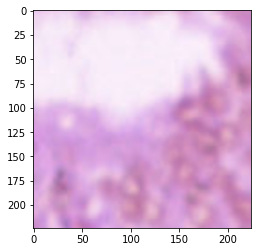

In [ ]:
X = []
Y = []

images_class = {
    'benign' : 0,
    'malignant' : 1
}

for label in images_path:
    counter = 0
    for image_path in images_path[label]:
      counter += 1
      if(counter < 1000):
        print(counter)
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])

plt.imshow(X[0])
plt.show()

In [ ]:
x = np.array(X)
y = np.array(Y)

pre_trained_models = {}

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape

(1598, 224, 224, 3)

In [ ]:
X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]])

X_train.shape  # (1274, 150528)

(1598, 150528)

In [ ]:
from tables import utils
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

from tensorflow import keras
import scipy, sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.037s...
[t-SNE] Computed neighbors for 300 samples in 13.570s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 419.381956
[t-SNE] KL divergence after 250 iterations with early exaggeration: 102.750092
[t-SNE] KL divergence after 1000 iterations: 1.000825


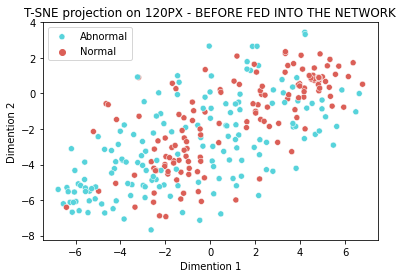

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, verbose = 1, random_state = 200, metric = "manhattan")
z = tsne.fit_transform(X_train[:300,])


df = pd.DataFrame()
df["y"] = Y_train[:300,]
df["Dimention 1"] = z[:300,0]
df["Dimention 2"] = z[:300,1]


import seaborn as sns
sns.scatterplot(x = "Dimention 1", y = "Dimention 2", hue = df.y.tolist(),
                palette = sns.color_palette("hls", 2),
                data = df).set(title = "T-SNE projection on 120PX - BEFORE FED INTO THE NETWORK")
plt.legend(labels = ["Abnormal", "Normal"])



plt.savefig('./drive/MyDrive/TSNE_120_before.svg', bbox_inches='tight')

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B0
pre_trained_models["EfficientNetV2B0"] = EfficientNetV2B0(include_top=False, input_shape=(224, 224, 3), pooling="avg", weights = 'imagenet')
for layer in pre_trained_models["EfficientNetV2B0"].layers:
    layer.trainable = False

24274472/24274472 [==============================] - 0s 0us/step


In [ ]:
X_train = np.reshape(X_train, [X_train.shape[0], 224, 224, 3])
X_train.shape

(1598, 224, 224, 3)

In [ ]:
X_train = pre_trained_models["EfficientNetV2B0"].predict(X_train)
X_test = pre_trained_models["EfficientNetV2B0"].predict(X_test)

13/13 [==============================] - 17s 1s/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.001s...
[t-SNE] Computed neighbors for 300 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.121820
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.664764
[t-SNE] KL divergence after 1000 iterations: 0.974172


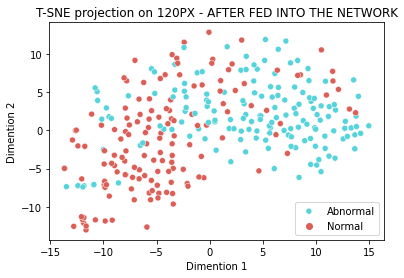

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, random_state = 0, metric = "manhattan")
z = tsne.fit_transform(X_train[:300,])


df = pd.DataFrame()
df["y"] = Y_train[:300,]
df["Dimention 1"] = z[:300,0]
df["Dimention 2"] = z[:300,1]


import seaborn as sns
sns.scatterplot(x="Dimention 1", y="Dimention 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection on 120PX - AFTER FED INTO THE NETWORK")
plt.legend(labels = ["Abnormal", "Normal"])


plt.savefig('./drive/MyDrive/TSNE_120_after.svg', bbox_inches='tight')

In [ ]:
firstRun = False

In [ ]:
images_class = {
    'benign' : 0,
    'malignant' : 1
}

import sys

from keras.models import Model
import keras

pre_trained_models = {}

from tensorflow.keras.applications import EfficientNetV2B0
import numpy as np

pre_trained_models["EfficientNetV2B0"] = EfficientNetV2B0(include_top=False, input_shape=(224, 224, 3), pooling="avg", weights = 'imagenet')
for layer in pre_trained_models["EfficientNetV2B0"].layers:
    layer.trainable = False


# print(images_path["malignant"])
counter = 0




Y = []
Z = []
pos = 0
for label in images_path:
    print("label:")
    print(label)
    counter = 0
    for image_path in images_path[label]:
        # print(counter, ' / ', all)
        counter += 1
        pos += 1
        if pos > 59801:

          try:
            image = cv2.imread(image_path)
            image = cv2.resize(image,(224, 224))
            Z.append(image)
          except Exception as e:
            print("brokenStart")
            print(e)
            print("brokenEnd")
          
          if(counter % 500 == 0):

            temp = np.array(Z)         

            feature_EfficientNetB0 = pre_trained_models["EfficientNetV2B0"].predict(temp)
            print(feature_EfficientNetB0)

            for b in feature_EfficientNetB0:
              temp = np.array([b])
              if(firstRun):
                x = temp
                firstRun = False
              else:
                x = np.append(x,temp,axis = 0)
                print("x.shape:")
                print(x.shape)

           
            
            # print(X)
            Z = []
          

          if(pos % 5000 == 0):      
              print("inja:")

              Filename = "EfficientNetV2B0_120"
              addressX = "/content/drive/MyDrive/dani/120/" + Filename + "_X.txt"
              np.savetxt(addressX, x, fmt='%s')

              print("savveeed at pos:")
              print(pos)



          print("counter:")
          print(counter)
          print("pos:")
          print(pos)
          
          print("label:" + label)
        else:
          continue



Streaming output truncated to the last 5000 lines.
39664
pos:
64465
label:benign
counter:
39665
pos:
64466
label:benign
counter:
39666
pos:
64467
label:benign
counter:
39667
pos:
64468
label:benign
counter:
39668
pos:
64469
label:benign
counter:
39669
pos:
64470
label:benign
counter:
39670
pos:
64471
label:benign
counter:
39671
pos:
64472
label:benign
counter:
39672
pos:
64473
label:benign
counter:
39673
pos:
64474
label:benign
counter:
39674
pos:
64475
label:benign
counter:
39675
pos:
64476
label:benign
counter:
39676
pos:
64477
label:benign
counter:
39677
pos:
64478
label:benign
counter:
39678
pos:
64479
label:benign
counter:
39679
pos:
64480
label:benign
counter:
39680
pos:
64481
label:benign
counter:
39681
pos:
64482
label:benign
counter:
39682
pos:
64483
label:benign
counter:
39683
pos:
64484
label:benign
counter:
39684
pos:
64485
label:benign
counter:
39685
pos:
64486
label:benign
counter:
39686
pos:
64487
label:benign
counter:
39687
pos:
64488
label:benign
counter:
39688
pos:
64

In [ ]:
Filename = "Res50_120px_Y.txt"

addressX = "/content/drive/MyDrive/dani/120/complated/" + Filename

y = np.loadtxt(addressX)

print(y.shape)

(65261,)


In [ ]:
print(x.shape)

(65261, 1280)


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier
import lightgbm as lgb
# Initialize data

maxXG_iHolder = 0
maxCAT_iHolder = 0
maxLGBM_iHolder = 0
maxXG = 0
maxCAT = 0
maxLGBM = 0



learnXG_iHolder = 0
learnCAT_iHolder = 0
learnLGBM_iHolder = 0


for i in range(0,101):

  tempL = 1

  print("i:")
  print(i)

  # X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=i)


  # result = {}
  # Classifier = XGBClassifier(learning_rate=tempL, n_estimators=150, random_state=0, seed=0, gamma=0)
  # Classifier.fit(X_train, Y_train)
  # Y_pred = Classifier.predict(X_test)
  # ac = accuracy_score(Y_test, Y_pred)
  # print("Accuracy score : ", ac)

  # if(ac > maxXG):
  #   maxXG = ac
  #   maxXG_iHolder = i


  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=i)
  

  model = CatBoostClassifier(iterations=1000,learning_rate=tempL,depth=2)
  model.fit(X_train, Y_train,verbose=False)
  Y_pred = model.predict(X_test)
  ac = accuracy_score(Y_test, Y_pred)
  print("Accuracy score : ", ac)

  if(ac > maxCAT):
    maxCAT = ac
    maxCAT_iHolder = i


  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=i)


  import lightgbm as lgb
  model = lgb.LGBMClassifier(learning_rate=tempL,max_depth=-2,random_state=0)
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  ac = accuracy_score(Y_test, Y_pred)
  print("Accuracy score : ", ac)

  if(ac > maxLGBM):
    maxLGBM = ac
    maxLGBM_iHolder = i


  print("maxXG:")
  print(maxXG)

  print("maxCAT:")
  print(maxCAT)

  print("maxLGBM:")
  print(maxLGBM)





  
  print("maxXG_iHolder:")
  print(maxXG_iHolder)

  print("maxCAT_iHolder:")
  print(maxCAT_iHolder)

  print("maxLGBM_iHolder:")
  print(maxLGBM_iHolder)


  
  print("maxXG:")
  print(maxXG)

  print("maxCAT:")
  print(maxCAT)

  print("maxLGBM:")
  print(maxLGBM)


i:
0
Accuracy score :  0.9135830843484256
Accuracy score :  0.8770397609744887
maxXG:
0
maxCAT:
0.9135830843484256
maxLGBM:
0.8770397609744887
maxXG_iHolder:
0
maxCAT_iHolder:
0
maxLGBM_iHolder:
0
maxXG:
0
maxCAT:
0.9135830843484256
maxLGBM:
0.8770397609744887
i:
1
Accuracy score :  0.9056921780433617
Accuracy score :  0.8643223779973952
maxXG:
0
maxCAT:
0.9135830843484256
maxLGBM:
0.8770397609744887
maxXG_iHolder:
0
maxCAT_iHolder:
0
maxLGBM_iHolder:
0
maxXG:
0
maxCAT:
0.9135830843484256
maxLGBM:
0.8770397609744887
i:
2
Accuracy score :  0.9145790239791619
Accuracy score :  0.8686125794836436
maxXG:
0
maxCAT:
0.9145790239791619
maxLGBM:
0.8770397609744887
maxXG_iHolder:
0
maxCAT_iHolder:
2
maxLGBM_iHolder:
0
maxXG:
0
maxCAT:
0.9145790239791619
maxLGBM:
0.8770397609744887
i:
3
Accuracy score :  0.9161112387956791
Accuracy score :  0.86608442503639
maxXG:
0
maxCAT:
0.9161112387956791
maxLGBM:
0.8770397609744887
maxXG_iHolder:
0
maxCAT_iHolder:
3
maxLGBM_iHolder:
0
maxXG:
0
maxCAT:
0.916

In [ ]:
from catboost import CatBoostClassifier
import lightgbm as lgb
# Initialize data

maxXG_iHolder = 0
maxCAT_iHolder = 1
maxLGBM_iHolder = 1
maxXG = 0
maxCAT = 0
maxLGBM = 0



learnXG_iHolder = 0
learnCAT_iHolder = 0
learnLGBM_iHolder = 0


for i in range(1,10):

  tempL = i / 10

  print("i:")
  print(i)

  # X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=maxXG_iHolder)


  # result = {}
  # Classifier = XGBClassifier(learning_rate=tempL, n_estimators=50, random_state=0, seed=0, gamma=0)
  # Classifier.fit(X_train, Y_train)
  # Y_pred = Classifier.predict(X_test)
  # ac = accuracy_score(Y_test, Y_pred)
  # print("Accuracy score : ", ac)

  # if(ac > maxXG):
  #   maxXG = ac
  #   maxXG_iHolder = i


  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=maxCAT_iHolder)
  

  model = CatBoostClassifier(iterations=1000,learning_rate=tempL,depth=2)
  model.fit(X_train, Y_train,verbose=False)
  Y_pred = model.predict(X_test)
  ac = accuracy_score(Y_test, Y_pred)
  print("Accuracy score : ", ac)

  if(ac > maxCAT):
    maxCAT = ac
    learnCAT_iHolder = tempL


  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=maxLGBM_iHolder)


  import lightgbm as lgb
  model = lgb.LGBMClassifier(learning_rate=tempL,max_depth=-5,random_state=0)
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  ac = accuracy_score(Y_test, Y_pred)
  print("Accuracy score : ", ac)

  if(ac > maxLGBM):
    maxLGBM = ac
    learnLGBM_iHolder = tempL


  print("maxXG:")
  print(maxXG)

  print("maxCAT:")
  print(maxCAT)

  print("maxLGBM:")
  print(maxLGBM)





  
  print("maxXG_iHolder:")
  print(maxXG_iHolder)

  print("maxCAT_iHolder:")
  print(maxCAT_iHolder)

  print("maxLGBM_iHolder:")
  print(maxLGBM_iHolder)


  
  print("maxXG:")
  print(maxXG)

  print("maxCAT:")
  print(maxCAT)

  print("maxLGBM:")
  print(maxLGBM)


i:
1
Accuracy score :  0.9135064736075997
Accuracy score :  0.9056921780433617
maxXG:
0
maxCAT:
0.9135064736075997
maxLGBM:
0.9056921780433617
maxXG_iHolder:
0
maxCAT_iHolder:
1
maxLGBM_iHolder:
1
maxXG:
0
maxCAT:
0.9135064736075997
maxLGBM:
0.9056921780433617
i:
2
Accuracy score :  0.9199417758369723
Accuracy score :  0.9150386884241171
maxXG:
0
maxCAT:
0.9199417758369723
maxLGBM:
0.9150386884241171
maxXG_iHolder:
0
maxCAT_iHolder:
1
maxLGBM_iHolder:
1
maxXG:
0
maxCAT:
0.9199417758369723
maxLGBM:
0.9150386884241171
i:
3
Accuracy score :  0.9205546617635793
Accuracy score :  0.9184095610204551
maxXG:
0
maxCAT:
0.9205546617635793
maxLGBM:
0.9184095610204551
maxXG_iHolder:
0
maxCAT_iHolder:
1
maxLGBM_iHolder:
1
maxXG:
0
maxCAT:
0.9205546617635793
maxLGBM:
0.9184095610204551
i:
4
Accuracy score :  0.9180265073163257
Accuracy score :  0.9157281850915499
maxXG:
0
maxCAT:
0.9205546617635793
maxLGBM:
0.9184095610204551
maxXG_iHolder:
0
maxCAT_iHolder:
1
maxLGBM_iHolder:
1
maxXG:
0
maxCAT:
0.9

In [ ]:
print("learnCAT_iHolder")
print(learnCAT_iHolder)
print("learnLGBM_iHolder")
print(learnLGBM_iHolder)

print("maxCAT_iHolder")
print(maxCAT_iHolder)
print("maxLGBM_iHolder")
print(maxLGBM_iHolder)


learnCAT_iHolder
0.3
learnLGBM_iHolder
0.3
maxCAT_iHolder
1
maxLGBM_iHolder
1


In [ ]:
maxCAT_iHolder = 1
maxLGBM_iHolder = 1

learnCAT_iHolder = 0.3
learnLGBM_iHolder = 0.3

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=maxLGBM_iHolder)

In [ ]:
import lightgbm as lgb

maxXG = 0
Best_numLeaves = 0
skipper = False
skipper = True



for numLeaves in range(2,110):

  if(skipper):
    model = lgb.LGBMClassifier(learning_rate=learnLGBM_iHolder,num_leaves = numLeaves)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)
    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("numLeaves:",numLeaves)


    print()
    print("Best_params:")
    print("Best_numLeaves:",Best_numLeaves)
    print("Best_ac:",maxXG)






    if(ac > maxXG):
      maxXG = ac
      Best_numLeaves = numLeaves

      print("Best_params:")
      print("Best_numLeaves:",Best_numLeaves)
      print("Best_ac:",maxXG)







print("Best_params:")
print("Best_numLeaves:",Best_numLeaves)
print("Best_ac:",maxXG)

Accuracy score :  0.8637861028116142
Accuracy score :  0.8637861028116142
params:
numLeaves: 2

Best_params:
Best_numLeaves: 0
Best_ac: 0
Best_params:
Best_numLeaves: 2
Best_ac: 0.8637861028116142
Accuracy score :  0.8850838887612044
Accuracy score :  0.8850838887612044
params:
numLeaves: 3

Best_params:
Best_numLeaves: 2
Best_ac: 0.8637861028116142
Best_params:
Best_numLeaves: 3
Best_ac: 0.8850838887612044
Accuracy score :  0.8938175132153527
Accuracy score :  0.8938175132153527
params:
numLeaves: 4

Best_params:
Best_numLeaves: 3
Best_ac: 0.8850838887612044
Best_params:
Best_numLeaves: 4
Best_ac: 0.8938175132153527
Accuracy score :  0.8984907684057305
Accuracy score :  0.8984907684057305
params:
numLeaves: 5

Best_params:
Best_numLeaves: 4
Best_ac: 0.8938175132153527
Best_params:
Best_numLeaves: 5
Best_ac: 0.8984907684057305
Accuracy score :  0.9009423121121581
Accuracy score :  0.9009423121121581
params:
numLeaves: 6

Best_params:
Best_numLeaves: 5
Best_ac: 0.8984907684057305
Best_p

KeyboardInterrupt: ignored

In [ ]:
import lightgbm as lgb

maxXG = 0
Best_numLeaves = 82
Best_min_child_samples = 0
skipper = False
skipper = True

for min_child_samples in range(0,1250,250):

  if(skipper):
    model = lgb.LGBMClassifier(learning_rate=learnLGBM_iHolder,min_child_samples = min_child_samples,num_leaves = Best_numLeaves)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)
    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("numLeaves:",Best_numLeaves)
    print("min_child_samples:",min_child_samples)


    print()
    print("Best_params:")
    print("Best_numLeaves:",Best_numLeaves)
    print("Best_min_child_samples:",Best_min_child_samples)
    print("Best_ac:",maxXG)






    if(ac > maxXG):
      maxXG = ac
      Best_min_child_samples = min_child_samples

      print("Best_params:")
      print("Best_numLeaves:",Best_numLeaves)
      print("Best_min_child_samples:",Best_min_child_samples)
      print("Best_ac:",maxXG)



print("Best_params:")
print("Best_numLeaves:",Best_numLeaves)
print("Best_min_child_samples:",Best_min_child_samples)
print("Best_ac:",maxXG) 

Accuracy score :  0.9164176817589826
Accuracy score :  0.9164176817589826
params:
numLeaves: 82
min_child_samples: 0

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 0
Best_ac: 0
Best_params:
Best_numLeaves: 82
Best_min_child_samples: 0
Best_ac: 0.9164176817589826
Accuracy score :  0.9141193595342066
Accuracy score :  0.9141193595342066
params:
numLeaves: 82
min_child_samples: 250

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 0
Best_ac: 0.9164176817589826
Accuracy score :  0.9176434536121965
Accuracy score :  0.9176434536121965
params:
numLeaves: 82
min_child_samples: 500

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 0
Best_ac: 0.9164176817589826
Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_ac: 0.9176434536121965
Accuracy score :  0.9164942924998085
Accuracy score :  0.9164942924998085
params:
numLeaves: 82
min_child_samples: 750

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_ac: 0.9176434536121965
Accuracy score :  0

In [ ]:
import lightgbm as lgb

maxXG = 0
# Best_numLeaves = 65
# Best_min_child_samples = 250
Best_max_bin = 0
skipper = False
skipper = True

for max_bin in range(3,21,3):

  if(skipper):
    model = lgb.LGBMClassifier(learning_rate=learnLGBM_iHolder,max_bin=max_bin,min_child_samples = Best_min_child_samples,num_leaves = Best_numLeaves)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)
    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("numLeaves:",Best_numLeaves)
    print("min_child_samples:",min_child_samples)
    print("max_bin:",max_bin)
    


    print()
    print("Best_params:")
    print("Best_numLeaves:",Best_numLeaves)
    print("Best_min_child_samples:",Best_min_child_samples)
    print("Best_max_bin:",Best_max_bin)    
    print("Best_ac:",maxXG)






    if(ac > maxXG):
      maxXG = ac
      Best_max_bin = max_bin

      print("Best_params:")
      print("Best_numLeaves:",Best_numLeaves)
      print("Best_min_child_samples:",Best_min_child_samples)
      print("Best_max_bin:",Best_max_bin)    
      print("Best_ac:",maxXG)



print("Best_params:")
print("Best_numLeaves:",Best_numLeaves)
print("Best_min_child_samples:",Best_min_child_samples)
print("Best_max_bin:",Best_max_bin)    
print("Best_ac:",maxXG) 

Accuracy score :  0.9047728491534514
Accuracy score :  0.9047728491534514
params:
numLeaves: 82
min_child_samples: 1000
max_bin: 3

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 0
Best_ac: 0
Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 3
Best_ac: 0.9047728491534514
Accuracy score :  0.9176434536121965
Accuracy score :  0.9176434536121965
params:
numLeaves: 82
min_child_samples: 1000
max_bin: 6

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 3
Best_ac: 0.9047728491534514
Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_ac: 0.9176434536121965
Accuracy score :  0.9164176817589826
Accuracy score :  0.9164176817589826
params:
numLeaves: 82
min_child_samples: 1000
max_bin: 9

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_ac: 0.9176434536121965
Accuracy score :  0.9158814065732016
Accuracy score :  0.9158814065732016
params:
numLeaves: 82
min_c

In [ ]:
import lightgbm as lgb

maxXG = 0
# Best_numLeaves = 63
# Best_min_child_samples = 0
# Best_max_bin = 15
Best_max_depth = 0



skipper = False
skipper = True


for max_depth in range(2,17):

  if(skipper):
    model = lgb.LGBMClassifier(learning_rate=learnLGBM_iHolder,max_depth=max_depth,max_bin=Best_max_bin,min_child_samples = Best_min_child_samples,num_leaves = Best_numLeaves)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)
    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("numLeaves:",Best_numLeaves)
    print("min_child_samples:",Best_min_child_samples)
    print("max_depth:",max_depth)
    print("max_bin:",Best_max_bin)
    


    print()
    print("Best_params:")
    print("Best_numLeaves:",Best_numLeaves)
    print("Best_min_child_samples:",Best_min_child_samples)
    print("Best_max_bin:",Best_max_bin)    
    print("Best_max_depth:",Best_max_depth)
    print("Best_ac:",maxXG)






    if(ac > maxXG):
      maxXG = ac
      Best_max_depth = max_depth

      print("Best_params:")
      print("Best_numLeaves:",Best_numLeaves)
      print("Best_min_child_samples:",Best_min_child_samples)
      print("Best_max_bin:",Best_max_bin)    
      print("Best_max_depth:",Best_max_depth)
      print("Best_ac:",maxXG)



print("Best_params:")
print("Best_numLeaves:",Best_numLeaves)
print("Best_min_child_samples:",Best_min_child_samples)
print("Best_max_bin:",Best_max_bin)    
print("Best_max_depth:",Best_max_depth)
print("Best_ac:",maxXG) 

Accuracy score :  0.8893740902474527
Accuracy score :  0.8893740902474527
params:
numLeaves: 82
min_child_samples: 500
max_depth: 2
max_bin: 6

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_max_depth: 0
Best_ac: 0
Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_max_depth: 2
Best_ac: 0.8893740902474527
Accuracy score :  0.9040067417451927
Accuracy score :  0.9040067417451927
params:
numLeaves: 82
min_child_samples: 500
max_depth: 3
max_bin: 6

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_max_depth: 2
Best_ac: 0.8893740902474527
Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_max_depth: 3
Best_ac: 0.9040067417451927
Accuracy score :  0.9102122117520877
Accuracy score :  0.9102122117520877
params:
numLeaves: 82
min_child_samples: 500
max_depth: 4
max_bin: 6

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_max_depth: 3
Bes

In [ ]:
import lightgbm as lgb

maxXG = 0
# Best_numLeaves = 63
# Best_min_child_samples = 0
# Best_max_bin = 15
# Best_max_depth = 15
Best_min_child_weight = 0

skipper = False
skipper = True

for min_child_weight in range(20,50):

  if(skipper):
    model = lgb.LGBMClassifier(learning_rate=learnLGBM_iHolder,min_child_weight=min_child_weight,max_depth=Best_max_depth,max_bin=Best_max_bin,min_child_samples = Best_min_child_samples,num_leaves = Best_numLeaves)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)
    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("numLeaves:",Best_numLeaves)
    print("min_child_samples:",Best_min_child_samples)
    print("max_bin:",Best_max_bin)
    print("max_depth:",Best_max_depth)    
    print("min_child_weight:",min_child_weight)    


    print()
    print("Best_params:")
    print("Best_numLeaves:",Best_numLeaves)
    print("Best_min_child_samples:",Best_min_child_samples)
    print("Best_max_bin:",Best_max_bin)    
    print("Best_max_depth:",Best_max_depth)
    print("Best_min_child_weight:",Best_min_child_weight)    
    print("Best_ac:",maxXG)






    if(ac > maxXG):
      maxXG = ac
      Best_min_child_weight = min_child_weight

      print("Best_params:")
      print("Best_numLeaves:",Best_numLeaves)
      print("Best_min_child_samples:",Best_min_child_samples)
      print("Best_max_bin:",Best_max_bin)    
      print("Best_max_depth:",Best_max_depth)
      print("Best_min_child_weight:",Best_min_child_weight)    
      print("Best_ac:",maxXG)



print("Best_params:")
print("Best_numLeaves:",Best_numLeaves)
print("Best_min_child_samples:",Best_min_child_samples)
print("Best_max_bin:",Best_max_bin)    
print("Best_max_depth:",Best_max_depth)
print("Best_min_child_weight:",Best_min_child_weight)    
print("Best_ac:",maxXG) 

Accuracy score :  0.916724124722286
Accuracy score :  0.916724124722286
params:
numLeaves: 82
min_child_samples: 500
max_bin: 6
max_depth: 14
min_child_weight: 20

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_max_depth: 14
Best_min_child_weight: 0
Best_ac: 0
Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_max_depth: 14
Best_min_child_weight: 20
Best_ac: 0.916724124722286
Accuracy score :  0.9148088562016394
Accuracy score :  0.9148088562016394
params:
numLeaves: 82
min_child_samples: 500
max_bin: 6
max_depth: 14
min_child_weight: 21

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
Best_max_depth: 14
Best_min_child_weight: 20
Best_ac: 0.916724124722286
Accuracy score :  0.9169539569447637
Accuracy score :  0.9169539569447637
params:
numLeaves: 82
min_child_samples: 500
max_bin: 6
max_depth: 14
min_child_weight: 22

Best_params:
Best_numLeaves: 82
Best_min_child_samples: 500
Best_max_bin: 6
B

## CAT

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=maxCAT_iHolder)

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

maxXG = 0
Best_numLeaves = 0
skipper = False
skipper = True

Best_iterations = 0


for iterations in range(100,1000,100):

  if(skipper):



    model = CatBoostClassifier(iterations=iterations,learning_rate=learnCAT_iHolder,depth=2)
    model.fit(X_train, Y_train,verbose=False)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)

    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("iterations:",iterations)


    print()
    print("Best_params:")
    print("Best_iterations:",Best_iterations)
    print("Best_ac:",maxXG)


    if(ac > maxXG):
      maxXG = ac
      Best_iterations = iterations

      print("Best_params:")
      print("Best_iterations:",Best_iterations)
      print("Best_ac:",maxXG)







print("Best_params:")
print("Best_iterations:",Best_iterations)
print("Best_ac:",maxXG)

Accuracy score :  0.8876120432084579
Accuracy score :  0.8876120432084579
params:
iterations: 100

Best_params:
Best_iterations: 0
Best_ac: 0
Best_params:
Best_iterations: 100
Best_ac: 0.8876120432084579
Accuracy score :  0.9014019765571133
Accuracy score :  0.9014019765571133
params:
iterations: 200

Best_params:
Best_iterations: 100
Best_ac: 0.8876120432084579
Best_params:
Best_iterations: 200
Best_ac: 0.9014019765571133
Accuracy score :  0.9091396613805256
Accuracy score :  0.9091396613805256
params:
iterations: 300

Best_params:
Best_iterations: 200
Best_ac: 0.9014019765571133
Best_params:
Best_iterations: 300
Best_ac: 0.9091396613805256
Accuracy score :  0.9125871447176894
Accuracy score :  0.9125871447176894
params:
iterations: 400

Best_params:
Best_iterations: 300
Best_ac: 0.9091396613805256
Best_params:
Best_iterations: 400
Best_ac: 0.9125871447176894
Accuracy score :  0.9168773462039378
Accuracy score :  0.9168773462039378
params:
iterations: 500

Best_params:
Best_iterations

In [ ]:
from catboost import CatBoostClassifier

maxXG = 0
Best_numLeaves = 0
skipper = False
skipper = True

# Best_iterations = 1000
Best_l2_leaf_reg = 0

l2_leaf_regArr = [1,3,5,10,100]


for l2_leaf_reg in l2_leaf_regArr:

  if(skipper):

    model = CatBoostClassifier(iterations=Best_iterations,l2_leaf_reg=l2_leaf_reg,learning_rate=learnCAT_iHolder,depth=2)
    model.fit(X_train, Y_train,verbose=False)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)

    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("iterations:",iterations)
    print("l2_leaf_reg:",l2_leaf_reg)
    


    print()
    print("Best_params:")
    print("Best_iterations:",Best_iterations)
    print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
    print("Best_ac:",maxXG)


    if(ac > maxXG):
      maxXG = ac
      Best_l2_leaf_reg = l2_leaf_reg

      print("Best_params:")
      print("Best_iterations:",Best_iterations)
      print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
      print("Best_ac:",maxXG)







print("Best_params:")
print("Best_iterations:",Best_iterations)
print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
print("Best_ac:",maxXG)

Accuracy score :  0.917873285834674
Accuracy score :  0.917873285834674
params:
iterations: 900
l2_leaf_reg: 1

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 0
Best_ac: 0
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 1
Best_ac: 0.917873285834674
Accuracy score :  0.9202482188002759
Accuracy score :  0.9202482188002759
params:
iterations: 900
l2_leaf_reg: 3

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 1
Best_ac: 0.917873285834674
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 3
Best_ac: 0.9202482188002759
Accuracy score :  0.9208611047268828
Accuracy score :  0.9208611047268828
params:
iterations: 900
l2_leaf_reg: 5

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 3
Best_ac: 0.9202482188002759
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_ac: 0.9208611047268828
Accuracy score :  0.9187926147245844
Accuracy score :  0.9187926147245844
params:
iterations: 900
l2_leaf_reg: 10

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_ac: 0.9208611

In [ ]:
from catboost import CatBoostClassifier

maxXG = 0
Best_numLeaves = 0
skipper = False
skipper = True

# Best_iterations = 1000
# Best_l2_leaf_reg = 10
Best_depth = 0

l2_leaf_regArr = [1,3,5,10,100]


for depth in range(2,11):

  if(skipper):

    model = CatBoostClassifier(iterations=Best_iterations,l2_leaf_reg=Best_l2_leaf_reg,learning_rate=learnCAT_iHolder,depth=depth)
    model.fit(X_train, Y_train,verbose=False)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)

    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("iterations:",Best_iterations)
    print("l2_leaf_reg:",Best_l2_leaf_reg)
    print("depth:",depth)
    


    print()
    print("Best_params:")
    print("Best_iterations:",Best_iterations)
    print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
    print("Best_depth:",Best_depth)
    print("Best_ac:",maxXG)


    if(ac > maxXG):
      maxXG = ac
      Best_depth = depth

      print("Best_params:")
      print("Best_iterations:",Best_iterations)
      print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
      print("Best_depth:",Best_depth)
      print("Best_ac:",maxXG)







print("Best_params:")
print("Best_iterations:",Best_iterations)
print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
print("Best_depth:",Best_depth)
print("Best_ac:",maxXG)

Accuracy score :  0.9208611047268828
Accuracy score :  0.9208611047268828
params:
iterations: 900
l2_leaf_reg: 5
depth: 2

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 0
Best_ac: 0
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 2
Best_ac: 0.9208611047268828
Accuracy score :  0.9232360376924845
Accuracy score :  0.9232360376924845
params:
iterations: 900
l2_leaf_reg: 5
depth: 3

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 2
Best_ac: 0.9208611047268828
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 3
Best_ac: 0.9232360376924845
Accuracy score :  0.9241553665823948
Accuracy score :  0.9241553665823948
params:
iterations: 900
l2_leaf_reg: 5
depth: 4

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 3
Best_ac: 0.9232360376924845
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 4
Best_ac: 0.9241553665823948
Accuracy score :  0.9261472458438673
Accuracy score :  0.926147245843867

KeyboardInterrupt: ignored

In [ ]:
from catboost import CatBoostClassifier

maxXG = 0
Best_numLeaves = 0
skipper = False
skipper = True

Best_iterations = 900
Best_l2_leaf_reg = 5
Best_depth = 6
Best_border_count = 0

l2_leaf_regArr = [1,3,5,10,100]
border_countArr = [5,10,20,30,50,100,200]



for border_count in border_countArr:

  if(skipper):

    model = CatBoostClassifier(iterations=Best_iterations,border_count=border_count,l2_leaf_reg=Best_l2_leaf_reg,learning_rate=learnCAT_iHolder,depth=Best_depth)
    model.fit(X_train, Y_train,verbose=False)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)

    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("iterations:",Best_iterations)
    print("l2_leaf_reg:",Best_l2_leaf_reg)
    print("border_count:",Best_border_count)
    print("depth:",Best_depth)
    


    print()
    print("Best_params:")
    print("Best_iterations:",Best_iterations)
    print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
    print("Best_depth:",Best_depth)
    print("Best_border_count:",Best_border_count)
    print("Best_ac:",maxXG)


    if(ac > maxXG):
      maxXG = ac
      Best_border_count = border_count

      print("Best_params:")
      print("Best_iterations:",Best_iterations)
      print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
      print("Best_depth:",Best_depth)
      print("Best_border_count:",Best_border_count)
      print("Best_ac:",maxXG)







print("Best_params:")
print("Best_iterations:",Best_iterations)
print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
print("Best_depth:",Best_depth)
print("Best_border_count:",Best_border_count)
print("Best_ac:",maxXG)

Accuracy score :  0.92461503102735
Accuracy score :  0.92461503102735
params:
iterations: 900
l2_leaf_reg: 5
border_count: 0
depth: 6

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 0
Best_ac: 0
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 5
Best_ac: 0.92461503102735
Accuracy score :  0.9259174136213897
Accuracy score :  0.9259174136213897
params:
iterations: 900
l2_leaf_reg: 5
border_count: 5
depth: 6

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 5
Best_ac: 0.92461503102735
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 10
Best_ac: 0.9259174136213897
Accuracy score :  0.9267601317704742
Accuracy score :  0.9267601317704742
params:
iterations: 900
l2_leaf_reg: 5
border_count: 10
depth: 6

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 10
Best_ac: 0.9259174136213897
Best_params:
Best_it

In [ ]:
from catboost import CatBoostClassifier

maxXG = 0
Best_numLeaves = 0
skipper = False
skipper = True

# Best_iterations = 700
# Best_l2_leaf_reg = 3
# Best_depth = 6
# Best_border_count = 5
Best_min_data_in_leaf = 0


l2_leaf_regArr = [1,3,5,10,100]
border_countArr = [5,10,20,30,50,100,200]



for min_data_in_leaf in range(1,100):

  if(skipper):

    model = CatBoostClassifier(iterations=Best_iterations,min_data_in_leaf=min_data_in_leaf,border_count=Best_border_count,l2_leaf_reg=Best_l2_leaf_reg,learning_rate=learnCAT_iHolder,depth=Best_depth)
    model.fit(X_train, Y_train,verbose=False)
    Y_pred = model.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)

    print("Accuracy score : ", ac)

    print("Accuracy score : ", ac)
    print("params:")
    print("iterations:",Best_iterations)
    print("l2_leaf_reg:",Best_l2_leaf_reg)
    print("border_count:",Best_border_count)
    print("min_data_in_leaf:",min_data_in_leaf)    
    print("depth:",Best_depth)
    


    print()
    print("Best_params:")
    print("Best_iterations:",Best_iterations)
    print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
    print("Best_depth:",Best_depth)
    print("Best_border_count:",Best_border_count)
    print("Best_min_data_in_leaf:",Best_min_data_in_leaf)
    
    print("Best_ac:",maxXG)


    if(ac > maxXG):
      maxXG = ac
      Best_min_data_in_leaf = min_data_in_leaf

      print("Best_params:")
      print("Best_iterations:",Best_iterations)
      print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
      print("Best_depth:",Best_depth)
      print("Best_border_count:",Best_border_count)
      print("Best_min_data_in_leaf:",Best_min_data_in_leaf)
      print("Best_ac:",maxXG)







print("Best_params:")
print("Best_iterations:",Best_iterations)
print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
print("Best_depth:",Best_depth)
print("Best_border_count:",Best_border_count)
print("Best_min_data_in_leaf:",Best_min_data_in_leaf)
print("Best_ac:",maxXG)

Accuracy score :  0.9267601317704742
Accuracy score :  0.9267601317704742
params:
iterations: 900
l2_leaf_reg: 5
border_count: 20
min_data_in_leaf: 1
depth: 6

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 20
Best_min_data_in_leaf: 0
Best_ac: 0
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 20
Best_min_data_in_leaf: 1
Best_ac: 0.9267601317704742
Accuracy score :  0.9267601317704742
Accuracy score :  0.9267601317704742
params:
iterations: 900
l2_leaf_reg: 5
border_count: 20
min_data_in_leaf: 2
depth: 6

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 20
Best_min_data_in_leaf: 1
Best_ac: 0.9267601317704742
Accuracy score :  0.9267601317704742
Accuracy score :  0.9267601317704742
params:
iterations: 900
l2_leaf_reg: 5
border_count: 20
min_data_in_leaf: 3
depth: 6

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 20
Best_min_data_in_l

In [ ]:
print("learnCAT_iHolder")
print(learnCAT_iHolder)
print("learnLGBM_iHolder")
print(learnLGBM_iHolder)

print("maxCAT_iHolder")
print(maxCAT_iHolder)
print("maxLGBM_iHolder")
print(maxLGBM_iHolder)


learnCAT_iHolder
0
learnLGBM_iHolder
0
maxCAT_iHolder
51
maxLGBM_iHolder
23


In [ ]:
maxCAT_iHolder = 51
maxLGBM_iHolder = 23

learnCAT_iHolder = 0.3
learnLGBM_iHolder = 0.3

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=maxLGBM_iHolder)

In [ ]:
import lightgbm as lgb

maxXG = 0
Best_numLeaves = 82
Best_min_child_samples = 500
Best_max_bin = 6
Best_max_depth = 14
Best_min_child_weight = 25


min_child_weight = Best_min_child_weight

skipper = False
skipper = True

if(skipper):
  model = lgb.LGBMClassifier(learning_rate=learnLGBM_iHolder,min_child_weight=Best_min_child_weight,max_depth=Best_max_depth,max_bin=Best_max_bin,min_child_samples = Best_min_child_samples,num_leaves = Best_numLeaves)
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  ac = accuracy_score(Y_test, Y_pred)
  print("Accuracy score : ", ac)

  print("Accuracy score : ", ac)
  print("params:")
  print("numLeaves:",Best_numLeaves)
  print("min_child_samples:",Best_min_child_samples)
  print("max_bin:",Best_max_bin)
  print("max_depth:",Best_max_depth)    
  print("min_child_weight:",Best_min_child_weight)    


  print()
  print("Best_params:")
  print("Best_numLeaves:",Best_numLeaves)
  print("Best_min_child_samples:",Best_min_child_samples)
  print("Best_max_bin:",Best_max_bin)    
  print("Best_max_depth:",Best_max_depth)
  print("Best_min_child_weight:",Best_min_child_weight)    
  print("Best_ac:",maxXG)






  if(ac > maxXG):
    maxXG = ac
    Best_min_child_weight = min_child_weight

    print("Best_params:")
    print("Best_numLeaves:",Best_numLeaves)
    print("Best_min_child_samples:",Best_min_child_samples)
    print("Best_max_bin:",Best_max_bin)    
    print("Best_max_depth:",Best_max_depth)
    print("Best_min_child_weight:",Best_min_child_weight)    
    print("Best_ac:",maxXG)



print("Best_params:")
print("Best_numLeaves:",Best_numLeaves)
print("Best_min_child_samples:",Best_min_child_samples)
print("Best_max_bin:",Best_max_bin)    
print("Best_max_depth:",Best_max_depth)
print("Best_min_child_weight:",Best_min_child_weight)    
print("Best_ac:",maxXG) 

KeyboardInterrupt: ignored

In [ ]:
mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=maxCAT_iHolder)

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tables import utils
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

from tensorflow import keras
import scipy, sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.001s...
[t-SNE] Computed neighbors for 300 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.280135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.730949
[t-SNE] KL divergence after 1000 iterations: 1.004253


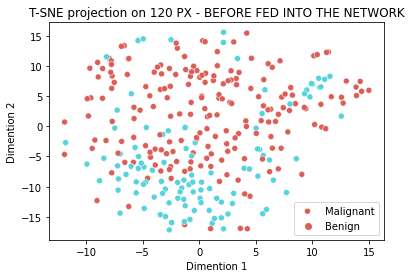

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, verbose = 1, random_state = 0, metric = "manhattan")
z = tsne.fit_transform(X_train[:300,])


df = pd.DataFrame()
df["y"] = Y_train[:300,]
df["Dimention 1"] = z[:300,0]
df["Dimention 2"] = z[:300,1]


import seaborn as sns
sns.scatterplot(x = "Dimention 1", y = "Dimention 2", hue = df.y.tolist(),
                palette = sns.color_palette("hls", 2),
                data = df).set(title = "T-SNE projection on 120 PX - BEFORE FED INTO THE NETWORK")
plt.legend(labels = ["Malignant", "Benign"])
plt.savefig('./drive/MyDrive/TSNE_before_120.svg',bbox_inches='tight')

In [ ]:
from catboost import CatBoostClassifier

maxXG = 0
Best_numLeaves = 0
skipper = False
skipper = True

Best_iterations = 900
Best_l2_leaf_reg = 5
Best_depth = 6
Best_border_count = 20
Best_min_data_in_leaf = 1


l2_leaf_regArr = [1,3,5,10,100]
border_countArr = [5,10,20,30,50,100,200]



min_data_in_leaf = Best_min_data_in_leaf

if(skipper):

  model = CatBoostClassifier(iterations=Best_iterations,min_data_in_leaf=min_data_in_leaf,border_count=Best_border_count,l2_leaf_reg=Best_l2_leaf_reg,learning_rate=learnCAT_iHolder,depth=Best_depth)
  model.fit(X_train, Y_train,verbose=False)
  Y_pred = model.predict(X_test)
  ac = accuracy_score(Y_test, Y_pred)

  print("Accuracy score : ", ac)

  print("Accuracy score : ", ac)
  print("params:")
  print("iterations:",Best_iterations)
  print("l2_leaf_reg:",Best_l2_leaf_reg)
  print("border_count:",Best_border_count)
  print("min_data_in_leaf:",min_data_in_leaf)    
  print("depth:",Best_depth)
  


  print()
  print("Best_params:")
  print("Best_iterations:",Best_iterations)
  print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
  print("Best_depth:",Best_depth)
  print("Best_border_count:",Best_border_count)
  print("Best_min_data_in_leaf:",Best_min_data_in_leaf)
  
  print("Best_ac:",maxXG)


  if(ac > maxXG):
    maxXG = ac
    Best_min_data_in_leaf = min_data_in_leaf

    print("Best_params:")
    print("Best_iterations:",Best_iterations)
    print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
    print("Best_depth:",Best_depth)
    print("Best_border_count:",Best_border_count)
    print("Best_min_data_in_leaf:",Best_min_data_in_leaf)
    print("Best_ac:",maxXG)







print("Best_params:")
print("Best_iterations:",Best_iterations)
print("Best_l2_leaf_reg:",Best_l2_leaf_reg)
print("Best_depth:",Best_depth)
print("Best_border_count:",Best_border_count)
print("Best_min_data_in_leaf:",Best_min_data_in_leaf)
print("Best_ac:",maxXG)

Accuracy score :  0.9318930514058071
Accuracy score :  0.9318930514058071
params:
iterations: 900
l2_leaf_reg: 5
border_count: 20
min_data_in_leaf: 1
depth: 6

Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 20
Best_min_data_in_leaf: 1
Best_ac: 0
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 20
Best_min_data_in_leaf: 1
Best_ac: 0.9318930514058071
Best_params:
Best_iterations: 900
Best_l2_leaf_reg: 5
Best_depth: 6
Best_border_count: 20
Best_min_data_in_leaf: 1
Best_ac: 0.9318930514058071


In [ ]:
ac = accuracy_score(Y_test, Y_pred)
print("Accuracy score : ", ac)


from sklearn.metrics import precision_score
precision_score = precision_score(Y_test, Y_pred)
print("precision_score : ", precision_score)



recal = recall_score(Y_test, Y_pred)
print("recall_score : ", recal)


tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
specificity = tn / (tn+fp)
print("specificity : ", specificity)


from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_pred)
print("f1_score : ", f1_score)


Accuracy score :  0.9318930514058071
precision_score :  0.9207292093404342
recall_score :  0.8995397238343006
specificity :  0.951961271102284
f1_score :  0.9100111347302359


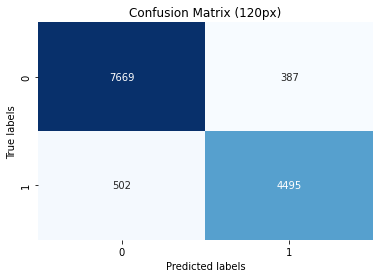

In [ ]:
import seaborn as sns
cm = confusion_matrix(Y_test, Y_pred)
ax= plt.subplot()


group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)



Cmatrix = sns.heatmap(cm, ax=ax, fmt = "", annot = True, cmap = "Blues", cbar = False)

figure = Cmatrix.get_figure()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (120px)'); 
figure.savefig('./drive/MyDrive/EfficientNetV2B0_120.svg', bbox_inches='tight')

In [ ]:
class ProfitMetric:
    def is_max_optimal(self):
        return True # greater is better

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        y_pred = np.rint(approx)
        y_true = np.array(target).astype(int)

        output_weight = 1 # weight is not used

        score = get_profit(y_true, y_pred)
 
        return score, output_weight

    def get_final_error(self, error, weight):
        return error

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier
Best_iterations = 900
Best_l2_leaf_reg = 5
Best_depth = 6
Best_border_count = 20
Best_min_data_in_leaf = 1


l2_leaf_regArr = [1,3,5,10,100]
border_countArr = [5,10,20,30,50,100,200]



min_data_in_leaf = Best_min_data_in_leaf


class CountErrors:
    '''Count number of wrong predictions'''
    
    def is_max_optimal(self):
        False # Lower is better

    def evaluate(self, approxes, target, weight):  
        
        y_pred = np.array(approxes).argmax(0)
        y_true = np.array(target)
                                    
        return sum(y_pred!=y_true), 1

    def get_final_error(self, error, weight):
        return error
    



model = CatBoostClassifier(eval_metric = CountErrors(),iterations=Best_iterations,min_data_in_leaf=min_data_in_leaf,border_count=Best_border_count,l2_leaf_reg=Best_l2_leaf_reg,learning_rate=learnCAT_iHolder,depth=Best_depth)

evalset = [(X_train, Y_train), (X_test,Y_test)]
model.fit(X_train, Y_train, eval_set = evalset)
Y_pred = model.predict(X_test)
ac = accuracy_score(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/catboost/core.py:1759: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function array>) found for signature:
 
 >>> array(UniTuple(array(float64, 1d, C) x 1))
 
There are 4 candidate implementations:
   - Of which 4 did not match due to:
   Overload in function '_OverloadWrapper._build.<locals>.ol_generated': File: numba/core/overload_glue.py: Line 129.
     With argument(s): '(UniTuple(array(float64, 1d, C) x 1))':
    Rejected as the implementation raised a specific error:
      TypingError: array(float64, 1d, C) not allowed in a homogeneous sequence
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/npydecl.py:488

During: resolving callee type: Function(<built-in function array>)
During: typing of call at <ipython-input-19-1e68387d23b5> (25)


File "<ipython-input-19-1e68387d23b5>", line 25:
  

0:	learn: 19804.0000000	test: 19804.0000000	test1: 4997.0000000	best: 4997.0000000 (0)	total: 1.36s	remaining: 20m 22s
1:	learn: 19804.0000000	test: 19804.0000000	test1: 4997.0000000	best: 4997.0000000 (0)	total: 1.93s	remaining: 14m 27s
2:	learn: 19804.0000000	test: 19804.0000000	test1: 4997.0000000	best: 4997.0000000 (0)	total: 2.49s	remaining: 12m 23s
3:	learn: 19804.0000000	test: 19804.0000000	test1: 4997.0000000	best: 4997.0000000 (0)	total: 2.98s	remaining: 11m 7s
4:	learn: 19804.0000000	test: 19804.0000000	test1: 4997.0000000	best: 4997.0000000 (0)	total: 3.57s	remaining: 10m 39s
5:	learn: 19804.0000000	test: 19804.0000000	test1: 4997.0000000	best: 4997.0000000 (0)	total: 4.08s	remaining: 10m 8s
6:	learn: 19804.0000000	test: 19804.0000000	test1: 4997.0000000	best: 4997.0000000 (0)	total: 4.6s	remaining: 9m 46s
7:	learn: 19804.0000000	test: 19804.0000000	test1: 4997.0000000	best: 4997.0000000 (0)	total: 5.13s	remaining: 9m 31s
8:	learn: 19804.0000000	test: 19804.0000000	test1: 49

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


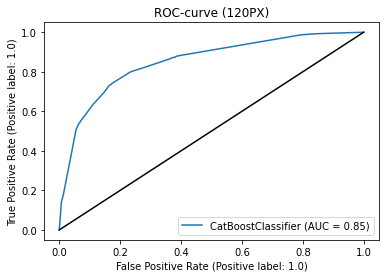

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, Y_test)
plt.plot([0,1], [0,1], c = 'k')
plt.title('ROC-curve (120PX)')
plt.savefig('./drive/MyDrive/plot_roc_curve_120_2.svg', bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


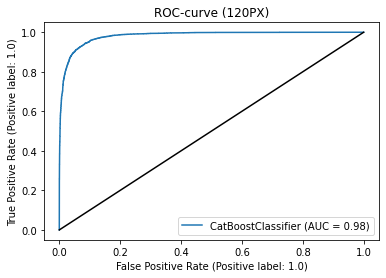

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, Y_test)
plt.plot([0,1], [0,1], c = 'k')
plt.title('ROC-curve (120PX)')
plt.savefig('./drive/MyDrive/plot_roc_curve_120.svg', bbox_inches='tight')

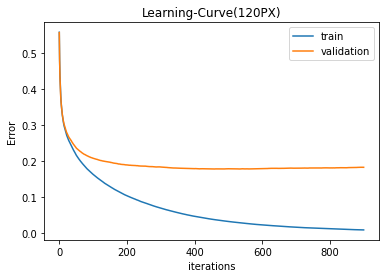

In [ ]:
results = model.get_evals_result()
plt.plot(results['validation_0']['Logloss'], label='train')
plt.plot(results['validation_1']['Logloss'], label='validation')
plt.title('Learning-Curve(120PX)')
plt.xlabel('iterations')
plt.ylabel('Logloss')

plt.ylabel('Error')
plt.legend()
 
plt.savefig('./drive/MyDrive/plot_Learning_curve_120.svg')

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [8]:

from tensorflow.keras.applications import EfficientNetV2B0


model = EfficientNetV2B0(include_top=False, input_shape=(224, 224, 3), pooling="avg", weights = 'imagenet')
model.summary()

24274472/24274472 [==============================] - 0s 0us/step
Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

## GradCam Effi

NameError: ignored

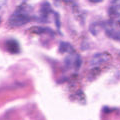

In [ ]:
path = "/content/drive/MyDrive/dani/GasHisSDB/120/Abnormal/" + "Abnormal-20797.png"

from tensorflow.keras.applications import EfficientNetV2B0


model_builder = keras.applications.EfficientNetV2B0
img_size = (224, 224)
preprocess_input = keras.applications.efficientnet_v2.preprocess_input
decode_predictions = keras.applications.efficientnet_v2.decode_predictions

last_conv_layer_name = "block6h_add"

# The local path to our target image
img_path = keras.utils.get_file(
    path, path
)

display(Image(img_path))


input_1
rescaling
normalization
stem_conv
stem_bn
stem_activation
block1a_project_conv
block1a_project_bn
block1a_project_activation
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_project_conv
block3a_project_bn
block3b_expand_conv
block3b_expand_bn
block3b_expand_activation
block3b_project_conv
block3b_project_bn
block3b_drop
block3b_add
block4a_expand_conv
block4a_expand_bn
block4a_expand_activation
block4a_dwconv2
block4a_bn
block4a_activation
block4a_se_squeeze
block4a_se_reshape
block4a_se_reduce
block4a_se_expand
block4a_se_excite
block4a_project_conv
block4a_project_bn
block4b_expand_conv
block4b_expand_bn
block4b_expand_activation
block4b_dwconv2
block4b_bn
block4b_activation
block4b_se_squeeze
block4b_se_reshape
block4b_se_

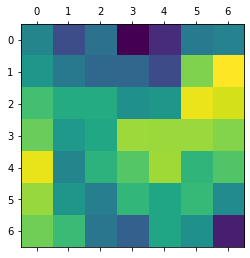

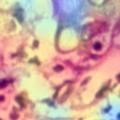

In [ ]:



# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(include_top=True, input_shape=(224, 224, 3), pooling="avg",weights="imagenet")

for layer in model.layers:
    print(layer.name)

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])



# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()




def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

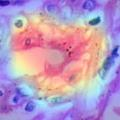

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


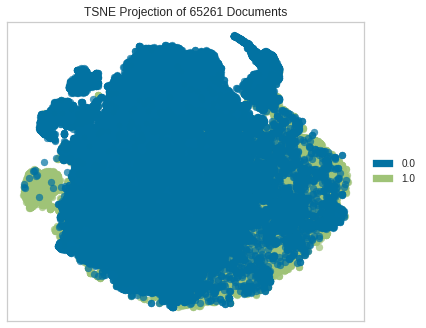

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies


# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(x, y)
tsne.show()